In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("season_start.csv")
df2 = pd.read_csv("season_finish.csv")
df1.columns = ['pos10','team_name','played10','points10','season10']
df2.columns=['pos38','team_name','played38','points38','season38']

In [5]:
df3 = pd.merge(df1, df2, on="team_name", how="right")

In [6]:
mask_same_year = df3["season10"] == df3["season38"]

In [7]:
df = df3.loc[mask_same_year]

In [13]:
# print(df["team_name"].value_counts())
print("Total number of teams played in Serie A in the last 15 years:", df["team_name"].nunique())
print( (df["team_name"].value_counts() == 16).value_counts())

Total number of teams played in Serie A in the last 15 years: 40
False    34
True      6
Name: team_name, dtype: int64


In [14]:
# create new column with position changes comparing positions after 10th and 38th rounds
df["pos_change"] = df["pos10"] - df["pos38"]

<ipython-input-14-3bc10a04cf6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pos_change"] = df["pos10"] - df["pos38"]


In [15]:
# Team gaining the most positions in the last 28 rounds
df.loc[[df['pos_change'].idxmax()]]

,pos10,team_name,played10,points10,season10,pos38,played38,points38,season38,pos_change
1987,18,AC Milan,10,-5,2005-2006,4,38,58,2005-2006,14


In [17]:
# Team losing the most positions in the last 28 rounds
df.loc[[df['pos_change'].idxmin()]]

,pos10,team_name,played10,points10,season10,pos38,played38,points38,season38,pos_change
1132,6,Sampdoria,10,15,2010-2011,18,38,36,2010-2011,-12


In [18]:
# create df where teams were 1st after the 10th round
first_after10 = df[df["pos10"] == 1].sort_values(by = "season10")
# create df where teams were 1st after the 38th round
first_after38 = df[df["pos38"] == 1].sort_values(by = "season38")

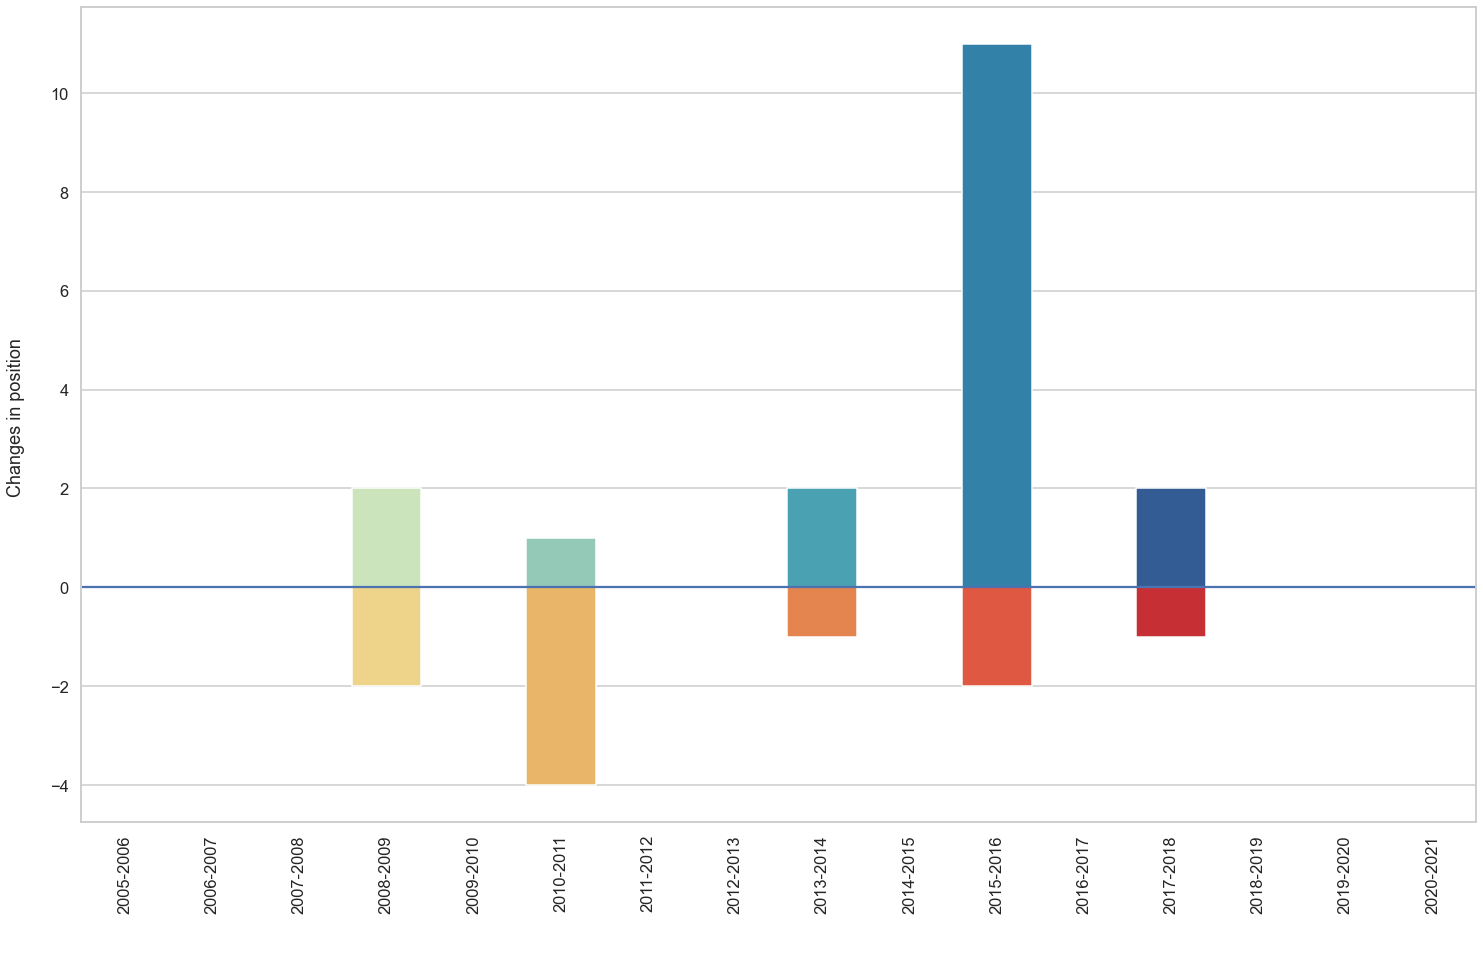

In [19]:
# combined barchart of position changes
# positive bar shows the team that eventually won the leage, and the positions it gained
# negative bar shows the team that was leading after 10 rounds and the amount of positions it lost

plt.figure(figsize=(25,15))
sns.set(style='whitegrid', context='talk', font_scale=1)
ax1 = sns.barplot(data = first_after10, y="pos_change", x="season10", palette="YlOrRd")
ax2 = sns.barplot(data = first_after38, y="pos_change", x="season10", palette="YlGnBu")
plt.xlabel("\n ")
plt.ylabel("Changes in position \n")
plt.xticks(rotation=90)
ax1.axhline(0);

## Create bar labels

In [25]:
# extract team names to an array
label_ax2 = first_after38["team_name"]
team_label = np.array(label_ax2)

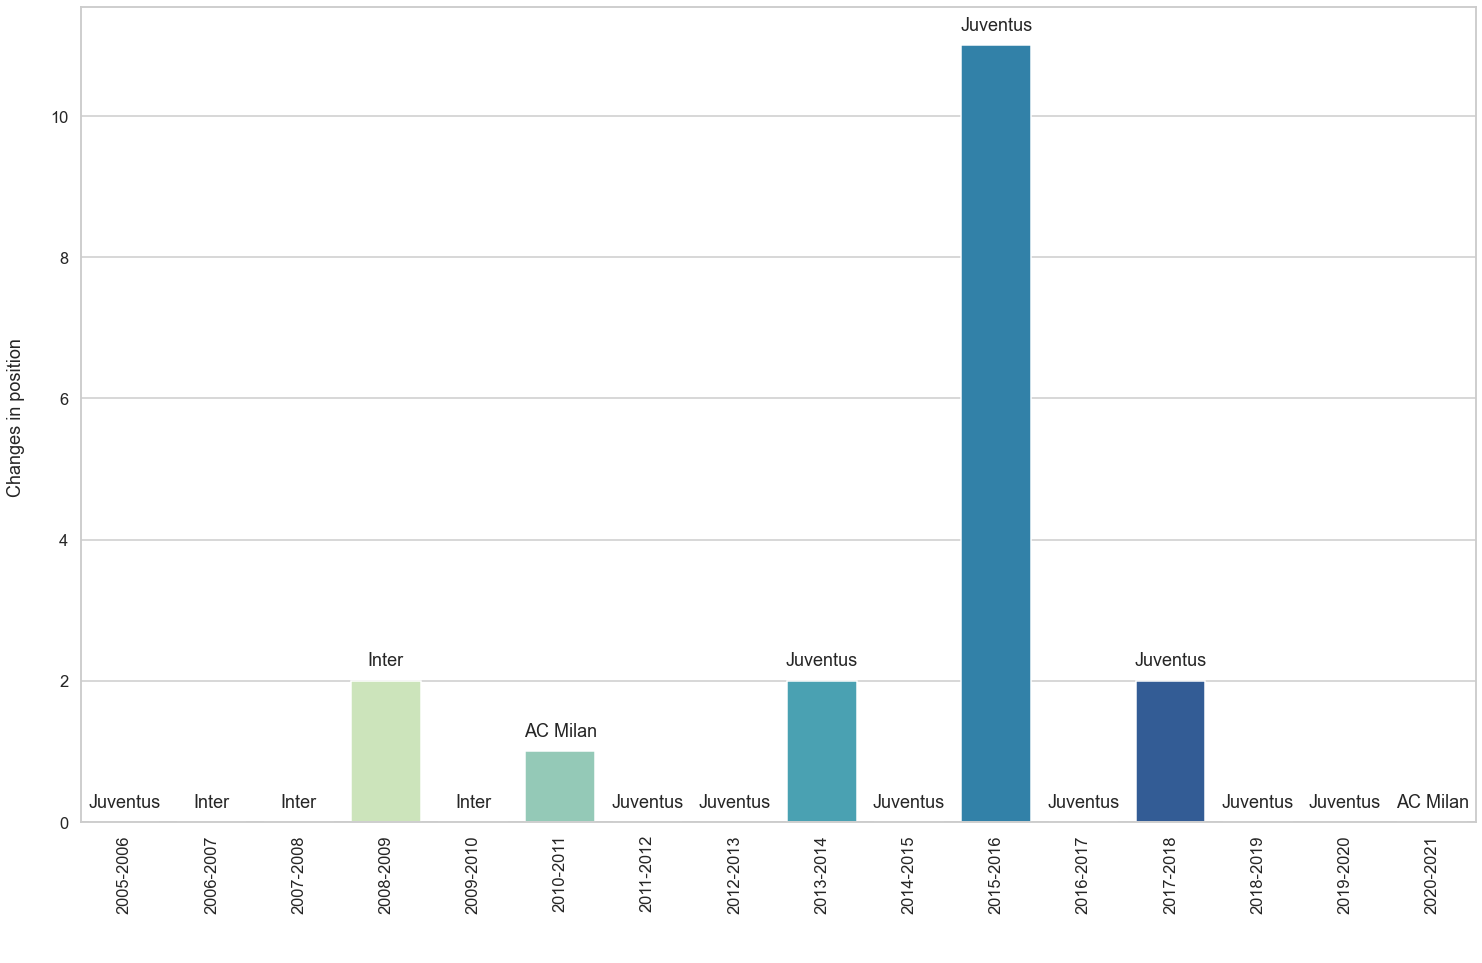

In [26]:
plt.figure(figsize=(25,15))
sns.set(style='whitegrid', context='talk', font_scale=1)
# ax1 = sns.barplot(data = first_after10, y="pos_change", x="season10", palette="YlOrRd")
ax2 = sns.barplot(data = first_after38, y="pos_change", x="season10", palette="YlGnBu")
plt.xlabel("\n ")
plt.ylabel("Changes in position \n")
plt.xticks(rotation=90)

i = 0
for p in ax2.patches:
    ax2.annotate(team_label[i],
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')
    i = i+1

In [27]:
label_ax1 = first_after10["team_name"]
team_label2 = np.array(label_ax1)

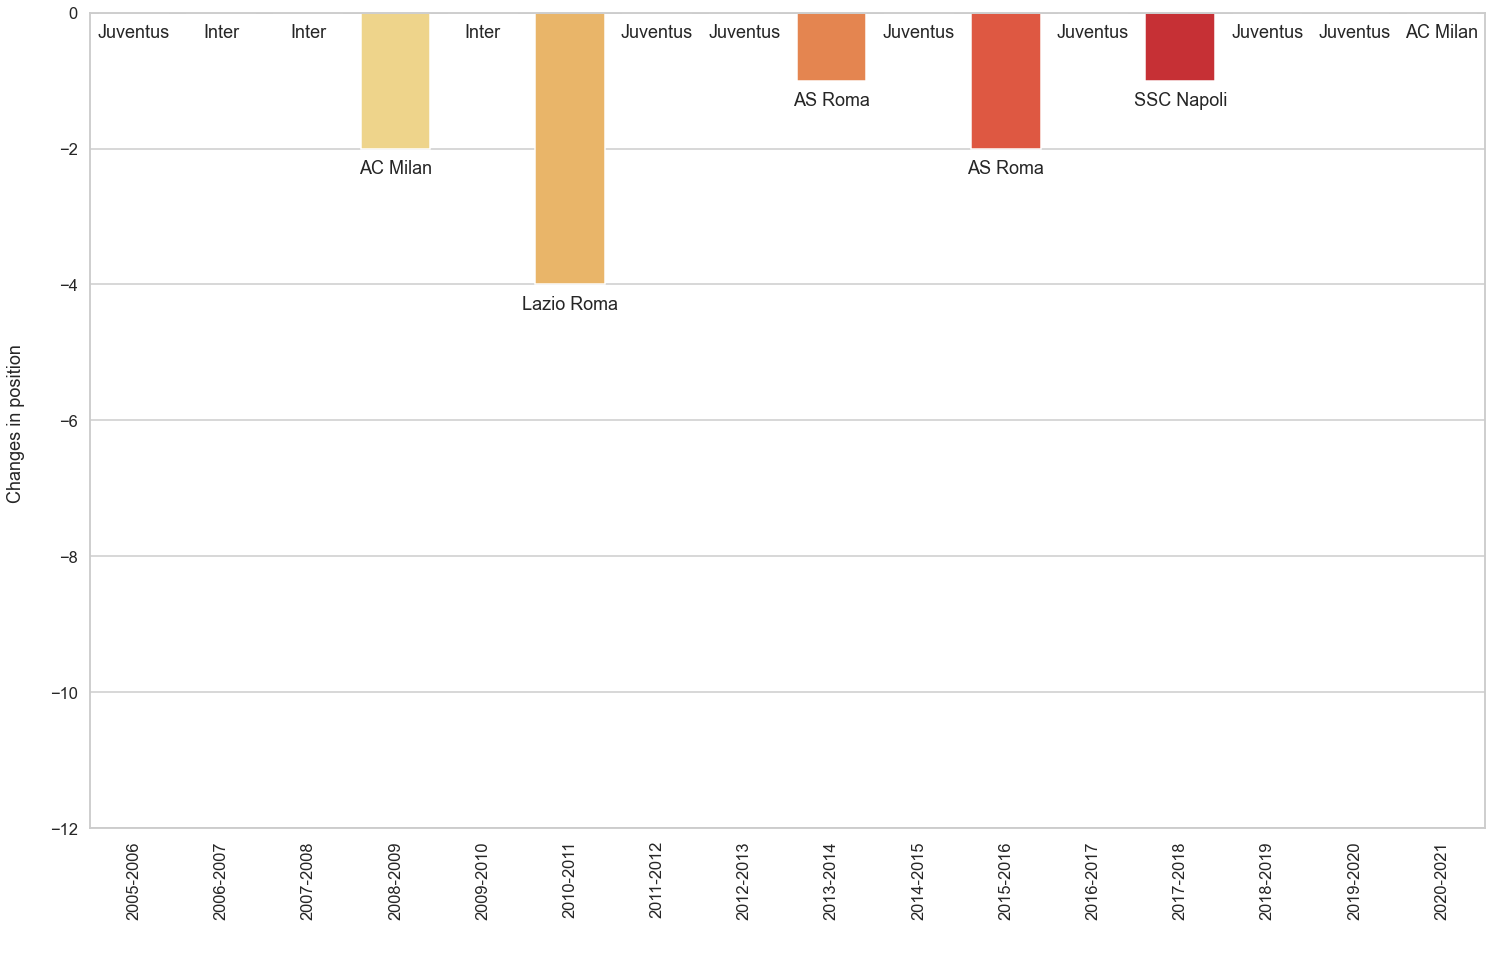

In [28]:
plt.figure(figsize=(25,15))
sns.set(style='whitegrid', context='talk', font_scale=1)
ax1 = sns.barplot(data = first_after10, y="pos_change", x="season10", palette="YlOrRd")
plt.xlabel("\n ")
plt.ylabel("Changes in position \n")
plt.xticks(rotation=90)
plt.ylim(-12, 0)

i = 0
for p in ax1.patches:
    ax1.annotate(team_label2[i],
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')
    i = i+1
